# Parameter File Tools

The potentials.paramfile module collects tools designed to read and write potential parameter files.

In [1]:
import potentials
from matplotlib import pyplot as plt

# LAMMPS EAM parameter file tools

These tools support reading the LAMMPS-formatted funcfl and setfl EAM function tabulation files.

## 1. load_eam()

Loads a LAMMPS-compatible EAM parameter file.  This will return an object associated with the file's format.
    
- __f__ (*path-like object or file-like object*) The parameter file to read in, either as a file path or as an open file-like object.
- __style__ (*str, optional*) The parameter file format.  'eam' will load funcfl files for the LAMMPS eam pair_style.  'eam/alloy' or 'alloy' will load setfl files for the LAMMPS eam/alloy pair_style.  'eam/fs' or 'fs' will load setfl files for the eam/fs pair_style.  If not given, will attempt to load the file using the different styles.  
        
__NOTE__: For single element potentials, the eam/alloy and eam/fs formats are identical.  If a single element eam/fs file is read in and style is not explicitly stated, then it will be interpreted as eam/alloy.

Load classic eam file

In [2]:
eam = potentials.paramfile.load_eam('files/Cu_smf7.eam')
print(eam)

Load eam/alloy file

In [3]:
alloy = potentials.paramfile.load_eam('files/Al99.eam.alloy')
print(alloy)

Load eam/fs file.  Note that style is explicitly specified otherwise the single element potential would be interpreted as eam/alloy.

In [4]:
fs = potentials.paramfile.load_eam('files/Ag_v2.eam.fs', style='fs')
print(fs)

## 2. EAM, EAMAlloy, EAMFS classes

These classes provide a means of both reading and constructing EAM parameter files.

### 2.1. Major format differences

Each of the three classes are designed to interpret files of different formats.  Because of this, there are certain key differences in the classes that reflect the associated formats.  For simplicity, the parameter file formats will be simply referred to here based on their associated LAMMPS pair style. 

- The eam format only allows for a single header comment line, while the eam/alloy and eam/fs formats allow for up to three header comment lines.
- The eam format can only represent a single element model, which is not assigned an identifying symbol.  All methods of the EAM class naturally refer to that specific element model and there is only one of each function tabulations allowed.  In contrast, the eam/alloy and eam/fs formats do allow for multiple element models and identify each with a short symbol.  Many methods of the EAMAlloy and EAMFS classes require that one or two symbols be specified so that the appropriate values can be retrieved or assigned to the appropriate model interactions.
- The eam format tabulates z(r), whereas the eam/alloy and eam/fs formats tabulate r*&phi;(r).  The relationship between z and &phi; is described below in section 2.3.2.
- In both the eam/alloy and eam/fs formats, there is one F(&rho;) function per symbol, and one r*&phi;(r) function per unique combination of symbol pairs.  For eam/alloy, only one &rho;(r) function is defined for each symbol, whereas eam/fs defines a &rho;(r) function for each permutation of symbol pairs.

### 2.2. Basic Attributes

- __pair_style__ (*str*) The LAMMPS pair style associated with the class and parameter file.
- __header__ (*str*) The header content that appears at the top of the file.  This is limited to a single line for EAM and three lines for the rest.  Can be directly set.
- __numr__ (*int*) The number of r values.
- __cutoffr__ (*float*) The cutoff r value.
- __deltar__ (*float*) The step size between the r values.
- __r__ (*numpy.NDArray*) The r values associated with the tabulated functions.
- __numrho__ (*int*) The number of rho values.
- __cutoffrho__ (*float*) The cutoff rho value. Note this corresponds to the maximum rho value used for the tabulation and is not directly used in the parameter file.
- __deltarho__ (*float*) The step size between the rho values.
- __rho__ (*numpy.NDArray*) The rho values associated with the tabulated functions.
- __hartree__ (*float*) The Hartree to eV conversion value to use.  Only available for the EAM class.
- __bohr__ (*float*) The Bohr radius to angstrom conversion value to use.  Only available for the EAM class.
- __symbols__ (*list*) The list of symbols that have been assigned.  Not available for the EAM class.


In [5]:
print('header:    ', eam.header)
print('pair_style:', eam.pair_style)
print('numr:      ', eam.numr)
print('cutoffr:   ', eam.cutoffr)
print('deltar:    ', eam.deltar)
print('numrho:    ', eam.numrho)
print('cutoffrho: ', eam.cutoffrho)
print('deltarho:  ', eam.deltarho)
print('hartree:   ', eam.hartree)
print('bohr:      ', eam.bohr)

header:     Cu functions for NiCu alloy (exponential Z)
pair_style: eam
numr:       500
cutoffr:    4.949999999999989
deltar:     0.009919839679358666
numrho:     500
cutoffrho:  0.19999999999999915
deltarho:   0.00040080160320641114
hartree:    27.2
bohr:       0.529


In [6]:
print('header:    ')
print(alloy.header)
print('pair_style:', alloy.pair_style)
print('numr:      ', alloy.numr)
print('cutoffr:   ', alloy.cutoffr)
print('deltar:    ', alloy.deltar)
print('numrho:    ', alloy.numrho)
print('cutoffrho: ', alloy.cutoffrho)
print('deltarho:  ', alloy.deltarho)
print('symbols:   ', alloy.symbols)

header:    
Al EAM from Phys. Rev. B 59, 3393 (1999) in the LAMMPS setfl format.    
 Conversion by C. A. Becker from Y. Mishin files.                        
 30 December 2008.  http://www.ctcms.nist.gov/potentials
pair_style: eam/alloy
numr:       10000
cutoffr:    6.28721
deltar:     0.000628721
numrho:     10000
cutoffrho:  1.9998
deltarho:   0.0002
symbols:    ['Al']


In [7]:
print('header:    ')
print(fs.header)
print('pair_style:', fs.pair_style)
print('numr:      ', fs.numr)
print('cutoffr:   ', fs.cutoffr)
print('deltar:    ', fs.deltar)
print('numrho:    ', fs.numrho)
print('cutoffrho: ', fs.cutoffrho)
print('deltarho:  ', fs.deltarho)
print('symbols:   ', fs.symbols)

header:    
"Simple N-body potentials for the noble metals and nickel" 
 G.J.Ackland, G.I.Tichy, V.Vitek, and M.W.Finnis, Phil.Mag.A, 56, 735. (1987) 
 Converted from MOLDY format by G.J.Ackland
pair_style: eam/fs
numr:       10000
cutoffr:    5.0043076614
deltar:     0.00050043076614
numrho:     10000
cutoffrho:  499.95000000000005
deltarho:   0.05
symbols:    ['Ag']


### 2.3. Analysis options

#### 2.3.1. Analysis Methods

These are the methods that return the current parameter values.

Note that the EAM class does not use any of the "symbol" parameters listed below as it only models a single element model which is not associated with a symbol.  For the other classes, the symbol parameter is optional if the potential only defines interactions for a single element.

- __load(f)__ Reads and loads a new parameter file, f.
- __print_overview()__ Prints a quick summary of the loaded content.
- __symbol_info(symbol=None)__ Returns a dict containing elemental information for a given model.  
- __F_rho(symbol=None, rho=None)__ Returns the tabulated embedding energy values. Both the EAMAlloy and EAMFS classes take only one symbol.
- __rho_r(symbol=None, r=None)__ Returns the tabulated electron density values. The EAMAlloy class takes only one symbol, while the EAMFS class can take up to two symbols.
- __rphi_r(symbol=None, r=None)__ Returns the tabulated r times pair energy values. Both the EAMAlloy and EAMFS classes can take up to two symbols.
- __phi_r(symbols=None, r=None)__ Returns the tabulated pair energy values. Both the EAMAlloy and EAMFS classes can take up to two symbols.
- __z_r(r=None)__ Returns the tabulated z values.  Only available for the EAM class.

In [8]:
eam.symbol_info()

{'number': 29, 'mass': 63.55, 'alat': 3.615, 'lattice': 'FCC'}

In [9]:
alloy.print_overview()

sym at#  mass      alat       lat
Al  13  26.982          4.05 fcc

rho: [0.0000e+00 2.0000e-04 4.0000e-04 ... 1.9994e+00 1.9996e+00 1.9998e+00]
r: [0.00000000e+00 6.28721000e-04 1.25744200e-03 ... 6.28532384e+00
 6.28595256e+00 6.28658128e+00]

F(rho):
Al [ 1.04222211e-10 -2.83315393e-03 -5.66328630e-03 ... -2.07681906e+00
 -2.07642147e+00 -2.07602374e+00]

rho(r):
Al [0.27858943 0.27841032 0.27823131 ... 0.         0.         0.        ]

r*phi(r):
Al Al [ 0.00000000e+00  3.93779371e-02  7.86661557e-02 ... -9.06252748e-10
 -2.68433414e-10 -3.33765555e-11]


In [10]:
fs.rphi_r()

array([0.00000000e+00, 3.16174668e+04, 3.14258813e+04, ...,
       5.05442059e-09, 1.49775591e-09, 1.87238214e-10])

#### 2.3.2. Tabulated function conversions

The classes are built to handle two different types of table conversions:

1. The tabulated values read in are directly stored.  If the tabulated value methods above are called without specifying r or rho, then the exact tabulated values are returned.  However, if a different set of r or rho values are given, then the returned values will be created by applying a cubic spline interpolation on the original table.
2. The tabulated z(r) values in the eam format relate to the r*&phi;(r) values in the other formats according to
$$ r \phi_{\alpha \beta}(r_{ij}) = E_h a_0 z_{\alpha}(r_{ij}) z_{\beta}(r_{ij}), $$
   where $E_h$ is the Hartree energy, $a_0$ is the Bohr radius and $\alpha$, $\beta$ refer to the species of atoms $i$, $j$.  &phi;(r) values can also be obtained for any format by dividing r*&phi;(r) by r.  Note that this will always result in the first &phi;(r) value being undefined. 

#### 2.3.3. Plotting methods 

Each of the tabulation methods listed in Section 1.2.3.1. also have corresponding plot_ methods that automatically create the associated plots.  All of these methods have the same parameters

- __symbols__ (*str or list, optional*) The symbol(s) associated with the specific function to plot.  Not used by the EAM class methods.  Optional if the potential is for a single element model.
- __n__ (*int, optional*) Indicates the numerical derivative of the function to plot.  Default value is 0 (no derivative).
- __figsize__ (*tuple, optional*) The figure size to use.  A tuple of width and height values.
- __matplotlib_axes__ (*matplotlib.axes, optional*) An existing matplotlib axes to add the plot to.  This allows for users to construct subplots containing the different functions.
- __xlim__ (*tuple, optional*) Tuple of the low/high x limits to include in the plot.
- __ylim__ (*tuple, optional*) Tuple of the low/high y limits to include in the plot.

Plot F(rho) and the first two derivatives of it for the EAM file.

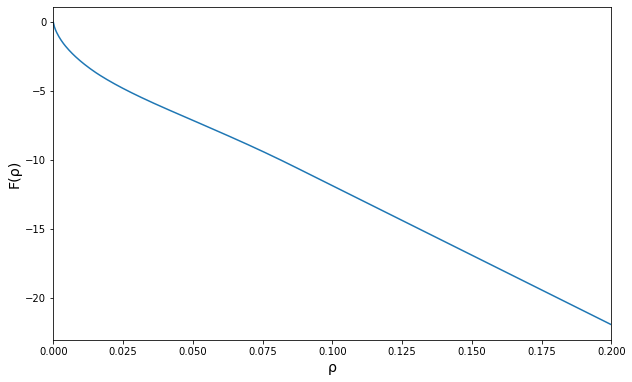

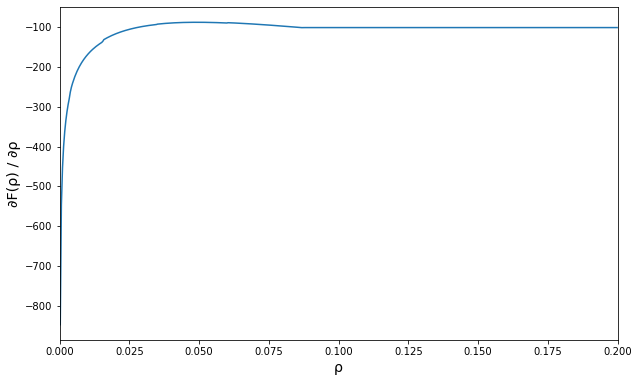

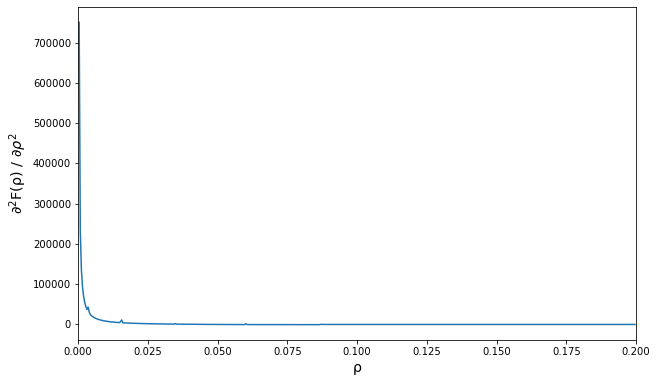

In [11]:
for i in range(3):
    eam.plot_F_rho(n=i)

Construct a subplot containing all three tabulated functions for the eam/alloy file

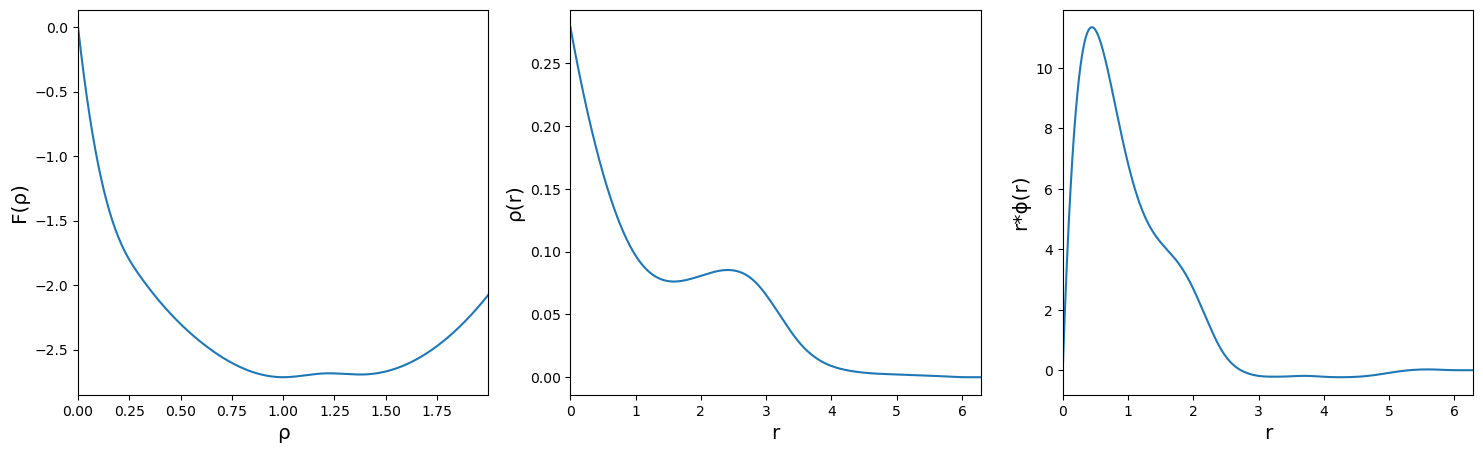

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))
alloy.plot_F_rho(matplotlib_axes=axs[0])
alloy.plot_rho_r(matplotlib_axes=axs[1])
alloy.plot_rphi_r(matplotlib_axes=axs[2])

### 2.4. Parameter file construction

The various classes also allow for the construction of new eam parameter files of the different formats.

#### 2.4.1. Construction methods

Note that the EAM class does not use any of the "symbol" parameters listed below as it only models a single element model which is not associated with a symbol.  For the other classes, the symbol parameter is optional if the potential only defines interactions for a single element.

- __set_r(num, cutoff=None, delta=None)__ Sets the r values to use in tabulating rho(r), z(r) and r\*&phi;(r).
- __set_rho(num, cutoff=None, delta=None)__ Sets the rho values to use in tabulating F(&rho;).
- __set_symbol_info(symbol, number, mass, alat, lattice)__ Assigns the metadata element information to a symbol.
- __set_F_rho(symbol, table=None, rho=None, fxn=None, **kwargs)__ Allows for the F(&rho;) function/table to be defined.  Both EAMAlloy and EAMFS classes take a single symbol.
- __set_rho_r(symbol, table=None, r=None, fxn=None, **kwargs)__ Allows for the &rho;(r) function/table to be defined.  The EAMAlloy class takes a single symbol, while the EAMFS class can take up to two symbols.
- __set_rphi_r(symbol, table=None, r=None, fxn=None, **kwargs)__ Allows for the r\*&phi;(r) function/table to be defined.   Both EAMAlloy and EAMFS classes take up to two symbols.
- __set_phi_r(symbol, table=None, r=None, fxn=None, **kwargs)__ Allows for the &phi;(r) function/table to be defined.   Both EAMAlloy and EAMFS classes take up to two symbols.
- __set_z_r(table=None, r=None, fxn=None, **kwargs)__ Allows for the z(r) function/table to be defined. Only available for the EAM class.
- __build(f=None, xf='%25.16e', ncolumns=5)__ Generates a parameter file using the xf float format settings and ncolumns settings.  Giving f allows for it to be saved to a file, otherwise it is returned as a str.

#### 2.4.2. Construction basics

For EAMAlloy and EAMFS, new symbols are defined using set_symbol_info().  The symbol_info() for a symbol must be set before any of the potential functions can be defined for that symbol.

The set_ methods for the potential functions allow for the functions to be defined in one of two ways. 
1. The "table" parameter allows for pre-tabulated values of the function to be given.  If r or rho is not given as well, then the table values are directly associated with the set r or rho values.  If r or rho is given and it differs from the set values, then a cubic spline interpolation will be built based on the given coordinates and values.
2. The "fxn" parameter allows for a Python function to be assigned to the corresponding potential function.  The tabulated values will then be freshly generated by evaluating this function against the set r or rho coordinates.  Any extra kwargs are used as passed along as parameters for fxn, which is useful for multi-element potentials where the same functional form but different fitted parameters are used for different symbol models.

For each symbol combination, only one of rphi_r, phi_r, or z_r needs to be set.  The classes will automatically convert to the alternate functions when the wanted function is called.

For the eam format, the default conversion constants are set to $E_h$ = 27.2 eV and $a_0$ = 0.529 &Aring;, which correspond to the values hard-coded into LAMMPS.  If you wish to use higher precision values, when you initialize an EAM object set the "constants" parameter to "precise", or give a tuple of conversion values as (hartree, bohr).

__See the Notebooks in potentials/scripts/eam parameter files/ for working examples.__

## 3. Format converters

The potentials.paramfile module also contains tools for converting from one format to another.  Note that to avoid losing information, the conversions can only go eam->eam/alloy->eam/fs.

### 3.1. eam_to_eam_alloy
    
Converts one or more parameter files in the eam format to the eam/alloy format.  Note that giving the r and rho parameters may be necessary if combining more than one eam file as they may not be tabulated for the same points.
    
- __eam__ (*path, file-like object, potentials.paramfile.EAM, or list*) One or more parameter files in the LAMMPS pair_style eam funcfl format.
- __symbol__ (*str or list*) The model symbol(s) to associate with the parameter file(s).
- __numr__ (*int, optional*) The number of r tabulation points to use in the alloy file.  If given, then cutoffr and/or deltar must be given.  If not given, will use the r tabulation points from the eam parameter file with the largest r cutoff.
- __cutoffr__ (*float, optional*) The r cutoff value to use in the alloy file.  Will be used in tabulating r values if numr is given and deltar is not.
- __deltar__ (*float, optional*) The r step size to use for the r tabulation points in the alloy file. If given, numr must also be given.
- __numrho__ (*int, optional*) The number of rho tabulation points to use in the alloy file. If given, then cutoffrho and/or deltarho must be given.  If not given, will use the rho tabulation points from the eam parameter file with the largest rho cutoff.
- __cutoffrho__ (*float, optional*) The rho cutoff value to use in the alloy file.  Will be used in tabulating rho values if numrho is given and deltarho is not.
- __deltarho__ (*float, optional*) The rho step size to use for the r tabulation points in the alloy file. If given, numrho must also be given.

In [13]:
eam2 = potentials.paramfile.eam_to_eam_alloy(eam, 'Cu')
print(eam2)

### 3.2. eam_alloy_to__alloy_fs

Converts a parameter file in the eam/alloy format to the eam/fs format.
    
- __alloy__ (*path, file-like object, or potentials.paramfile.EAMAlloy*) A parameter file in the LAMMPS pair_style eam/alloy setfl format.

In [14]:
alloy2 = potentials.paramfile.eam_alloy_to_eam_fs(alloy)
print(alloy2)